In [186]:
#pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [187]:
#pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [188]:
#pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [189]:
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

### Getting Data From World Bank Data through API

In [190]:
data =  wb.source.info()


In [191]:
s = wb.series.info()


In [192]:
# Exploring Data import with trial indicators
electricity_access = "EG.ELC.ACCS.ZS"
electricity_production_ex_hydro = "EG.ELC.RNWX.KH"

countries = ["CAN", "CHI", "CRI", "DEU", "GBR", "IND", "JPN", "NZL", "USA", "BRA"]

In [193]:
df1 = wb.data.DataFrame(["EG.ELC.ACCS.ZS", "EG.ELC.RNWX.KH"], ["CAN", "CHI", "CRI", "DEU", "GBR", "IND", "JPN", "NZL", "USA", "BRA"], time = 2015, columns = 'series')
df1

,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH
economy,,
BRA,99.710899,7.048700e+10
CAN,100.000000,4.203700e+10
CHI,100.000000,NaN
CRI,99.409805,2.637000e+09
DEU,100.000000,1.683890e+11
GBR,100.000000,7.726200e+10
IND,88.000000,7.414300e+10
JPN,100.000000,8.029200e+10
NZL,100.000000,1.086500e+10


In [194]:
df1.columns = ["Ececltricity Access %", "Renewable electricity excluding Hydro"]

In [195]:
#trying the query function for easy ID retrieval
wb.series.info(q='gdp')

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [196]:
#Trial target Dataframe
df2 = wb.data.DataFrame(["NY.GDP.PCAP.CD", "SH.XPD.CHEX.PC.CD", "SH.XPD.GHED.PC.CD", "SH.XPD.PVTD.PC.CD", "SP.POP.TOTL", "SP.DYN.LE00.IN", "SE.XPD.TOTL.GB.ZS"], ["CAN", "CHI", "CRI", "DEU", "GBR", "IND", "JPN", "NZL", "USA", "BRA"], range(2000, 2021, 3), columns = 'series').reset_index()
df2

,economy,time,NY.GDP.PCAP.CD,SE.XPD.TOTL.GB.ZS,SH.XPD.CHEX.PC.CD,SH.XPD.GHED.PC.CD,SH.XPD.PVTD.PC.CD,SP.DYN.LE00.IN,SP.POP.TOTL
0,BRA,YR2000,3749.910848,11.45216,312.539276,130.127461,181.417326,70.116000,174790339.0
1,BRA,YR2003,3070.436419,NaN,251.437942,107.758362,143.184478,71.170000,181809244.0
2,BRA,YR2006,5886.391522,12.42637,485.599335,208.455149,276.628872,72.260000,188167353.0
3,BRA,YR2009,8597.794335,14.72636,721.768005,318.756316,401.935627,73.300000,193886505.0
4,BRA,YR2012,12370.223255,15.72778,957.007080,414.975580,540.839382,74.209000,199287292.0
...,...,...,...,...,...,...,...,...,...
65,USA,YR2006,46302.000880,NaN,6828.615723,3159.012788,3669.603185,77.687805,298379912.0
66,USA,YR2009,47194.943355,NaN,7657.559082,3714.851415,3942.707305,78.390244,306771529.0
67,USA,YR2012,51784.418574,NaN,8342.580078,4074.731279,4267.848607,78.741463,313877662.0
68,USA,YR2015,56762.729452,13.54564,9392.066406,4804.292251,4587.773689,78.690244,320738994.0


In [197]:
#Removing null/missing values
df2.dropna(inplace=True)

In [198]:
df2.isnull().sum()

economy              0
time                 0
NY.GDP.PCAP.CD       0
SE.XPD.TOTL.GB.ZS    0
SH.XPD.CHEX.PC.CD    0
SH.XPD.GHED.PC.CD    0
SH.XPD.PVTD.PC.CD    0
SP.DYN.LE00.IN       0
SP.POP.TOTL          0
dtype: int64

In [199]:
#Renaiming the columns
df2.columns= ["Country", "Year", "GDP per capita", "Current health expenditure per capita", "Domestic general government health expenditure per capita", "Domestic private health expenditure per capita", "Population", "Life expectancy at birth, total (years)", "Government expenditure on education"]

In [200]:
#renaming Country from Country code to Country Name
df2['Country'] = df2['Country'].replace(['BRA', 'CAN', 'CRI', 'DEU', 'GBR', 'IND', 'NZL', 'USA'],['Brazil', 'Canada', 'Costa Rica', 'Germany', 'United Kingdom', 'India', 'New Zealand', 'United States'])

### Importing Plotly for User Controllable Visualizations

In [201]:
import plotly
import chart_studio.plotly as py
from chart_studio.grid_objs import Grid, Column
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

### Countries DataFrame

In [202]:
df = wb.economy.DataFrame(skipAggs = False).reset_index()
#df.drop(["aggregate", "longitude", "latitude", "adminregion", "lendingType", "incomeLevel", "capitalCity"])
x = pd.DataFrame(df)
x = x.drop(['aggregate', "longitude", "latitude", "adminregion", "lendingType", "incomeLevel", "capitalCity"], axis=1)
x.columns = ["economy", "Country Name", "Region"]
x

,economy,Country Name,Region
0,ABW,Aruba,LCN
1,AFE,Africa Eastern and Southern,
2,AFG,Afghanistan,SAS
3,AFW,Africa Western and Central,
4,AGO,Angola,SSF
...,...,...,...
261,XKX,Kosovo,ECS
262,YEM,"Yemen, Rep.",MEA
263,ZAF,South Africa,SSF
264,ZMB,Zambia,SSF


### Target Dataset

In [203]:
dataset = wb.data.DataFrame(["NY.GDP.PCAP.CD", "SH.XPD.CHEX.PC.CD", "SH.XPD.GHED.PC.CD", "SH.XPD.PVTD.PC.CD", "SP.POP.TOTL", "SP.DYN.LE00.IN", "SE.XPD.TOTL.GB.ZS"], time = range(2000, 2021, 5), columns = 'series').reset_index()
dataset.columns = ["economy", "Year", "GDP per capita", "Current health expenditure per capita", "Domestic general government health expenditure per capita", "Domestic private health expenditure per capita", "Population", "Life expectancy at birth, total (years)", "Government expenditure on education"]

In [204]:
dataset

,economy,Year,GDP per capita,Current health expenditure per capita,Domestic general government health expenditure per capita,Domestic private health expenditure per capita,Population,"Life expectancy at birth, total (years)",Government expenditure on education
0,ABW,YR2000,20614.799348,21.807711,NaN,NaN,NaN,73.787,90866.0
1,ABW,YR2005,23591.159838,18.888281,NaN,NaN,NaN,74.287,100028.0
2,ABW,YR2010,24134.473859,22.176781,NaN,NaN,NaN,75.017,101665.0
3,ABW,YR2015,28399.050131,23.201380,NaN,NaN,NaN,75.725,104339.0
4,ABW,YR2020,23384.298791,NaN,NaN,NaN,NaN,76.434,106766.0
...,...,...,...,...,...,...,...,...,...
1325,ZWE,YR2000,563.057504,NaN,NaN,NaN,NaN,44.649,11881482.0
1326,ZWE,YR2005,476.555403,NaN,NaN,NaN,NaN,43.241,12076697.0
1327,ZWE,YR2010,948.331481,8.536720,99.348557,26.111711,45.939417,50.640,12697728.0
1328,ZWE,YR2015,1445.069702,29.470831,107.686999,22.418236,59.147940,59.534,13814642.0


In [205]:
dataset = pd.merge(x, dataset, how='outer', on= "economy" )
dataset

,economy,Country Name,Region,Year,GDP per capita,Current health expenditure per capita,Domestic general government health expenditure per capita,Domestic private health expenditure per capita,Population,"Life expectancy at birth, total (years)",Government expenditure on education
0,ABW,Aruba,LCN,YR2000,20614.799348,21.807711,NaN,NaN,NaN,73.787,90866.0
1,ABW,Aruba,LCN,YR2005,23591.159838,18.888281,NaN,NaN,NaN,74.287,100028.0
2,ABW,Aruba,LCN,YR2010,24134.473859,22.176781,NaN,NaN,NaN,75.017,101665.0
3,ABW,Aruba,LCN,YR2015,28399.050131,23.201380,NaN,NaN,NaN,75.725,104339.0
4,ABW,Aruba,LCN,YR2020,23384.298791,NaN,NaN,NaN,NaN,76.434,106766.0
...,...,...,...,...,...,...,...,...,...,...,...
1325,ZWE,Zimbabwe,SSF,YR2000,563.057504,NaN,NaN,NaN,NaN,44.649,11881482.0
1326,ZWE,Zimbabwe,SSF,YR2005,476.555403,NaN,NaN,NaN,NaN,43.241,12076697.0
1327,ZWE,Zimbabwe,SSF,YR2010,948.331481,8.536720,99.348557,26.111711,45.939417,50.640,12697728.0
1328,ZWE,Zimbabwe,SSF,YR2015,1445.069702,29.470831,107.686999,22.418236,59.147940,59.534,13814642.0


### Cleaning Target Dataset

In [206]:
dataset.dropna(inplace=True)
dataset.isnull().sum()
dataset

,economy,Country Name,Region,Year,GDP per capita,Current health expenditure per capita,Domestic general government health expenditure per capita,Domestic private health expenditure per capita,Population,"Life expectancy at birth, total (years)",Government expenditure on education
5,AFE,Africa Eastern and Southern,,YR2000,713.177900,15.890510,44.195249,15.599017,26.082182,51.276129,398113044.0
6,AFE,Africa Eastern and Southern,,YR2005,1129.701204,18.143141,70.451047,26.970743,33.059165,53.966550,453404076.0
7,AFE,Africa Eastern and Southern,,YR2010,1659.654922,17.224030,107.706700,47.263324,44.576128,58.470697,518468229.0
8,AFE,Africa Eastern and Southern,,YR2015,1556.316469,16.962910,99.008506,45.038192,43.497951,62.259288,593871847.0
11,AFG,Afghanistan,SAS,YR2005,242.031313,15.080000,23.890501,1.270819,18.866350,58.290000,25654274.0
...,...,...,...,...,...,...,...,...,...,...,...
1321,ZMB,Zambia,SSF,YR2005,702.741118,7.729730,48.214775,12.864070,18.337992,48.496000,11856244.0
1322,ZMB,Zambia,SSF,YR2010,1489.459087,16.900000,55.392830,12.530782,17.591750,55.655000,13605986.0
1323,ZMB,Zambia,SSF,YR2015,1338.290927,16.335600,59.337643,27.969548,9.792813,61.737000,15879370.0
1327,ZWE,Zimbabwe,SSF,YR2010,948.331481,8.536720,99.348557,26.111711,45.939417,50.640000,12697728.0


In [207]:
#Removing Null region values and converting region code to Region Name
dataset['Region'].replace('', np.nan, inplace=True)
dataset.dropna(inplace=True)
dataset.isnull().sum()
dataset
dataset['Region'].unique()

array(['SAS', 'SSF', 'ECS', 'LCN', 'EAS', 'MEA', 'NAC'], dtype=object)

In [208]:
dataset['Region'] = dataset['Region'].replace(['SAS', 'SSF', 'ECS', 'LCN', 'EAS', 'MEA', 'NAC'], ['South Asia', 'Sub-Saharan Africa', 'Europe and Central Asia', 'Latin America & the Caribbean', 'East Asia and Pacific', 'Middle East and North Africa', 'North America'])

In [209]:
dataset['Region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe and Central Asia',
       'Latin America & the Caribbean', 'East Asia and Pacific',
       'Middle East and North Africa', 'North America'], dtype=object)

In [210]:
dataset['Country Name'].value_counts()

Tajikistan     4
Spain          4
Italy          4
Israel         4
Iceland        4
              ..
Luxembourg     1
Suriname       1
Nigeria        1
Palau          1
Korea, Rep.    1
Name: Country Name, Length: 161, dtype: int64

### Creating Scatter Plot to Compare GDP with the Current health expenditure

In [211]:
px.scatter(dataset, x="GDP per capita", y="Current health expenditure per capita", animation_frame="Year", animation_group="Country Name",
           size="Population", color="Region", hover_name="Country Name",
           log_x=True, size_max=100, range_x=[100,150000], range_y=[0,30])

### Creating Map Heat Graphs For Life Expectancy for each Country

In [212]:
fig = px.choropleth(dataset, locations="economy",
                    color="Life expectancy at birth, total (years)", 
                    hover_name="Country Name", animation_frame=dataset["Year"],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(transition = {'duration': 1000})
fig.show()

### Bar Graph to measure Life Expectancy With respect to population and Year

In [213]:
fig = px.bar(dataset, x='Year', y='Population',
             hover_data=['Country Name', 'Life expectancy at birth, total (years)', 'GDP per capita'], color='Life expectancy at birth, total (years)',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

### Line Graph to understand trends in Life Expectany in Latin America

In [214]:
df_filtered = dataset[dataset['Region'] == 'Latin America & the Caribbean']
fig = px.line(df_filtered, x="Year", y="Life expectancy at birth, total (years)", color='Country Name')
fig.show()

### Interactive density contour for GDP against life expectancy

In [215]:
fig = px.density_contour(dataset, 
                         x="GDP per capita", 
                         y="Life expectancy at birth, total (years)", 
                         animation_frame="Year", 
                         animation_group="Country Name", 
                         color="Region", 
                         range_y =[25, 100])
fig.show()

### 3D scatter plot to compare a country’s GDP and Population based on the region

In [216]:
fig = px.scatter_3d(dataset, x="Country Name", y="Population", z="GDP per capita", size = "GDP per capita", color ="Region")
fig.show()

In [217]:
s = wb.series.info()


In [218]:
#List of Countries
wb.economy.info()

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [219]:
#List of World Development Indicators
s = wb.series.info()



In [220]:
#Literacy Dataframe
df2 = wb.data.DataFrame(["SE.ADT.1524.LT.FE.ZS", "SE.ADT.1524.LT.MA.ZS"],['SAS', 'SSF', 'ECS', 'LCN', 'EAS', 'MEA', 'NAC'], range(2000, 2021, 3), columns = 'series').reset_index()


In [221]:
#Rename columns
df2 = df2.rename(columns={'SE.ADT.1524.LT.FE.ZS': 'Literacy rate, youth female (% of females ages 15-24', 'SE.ADT.1524.LT.MA.ZS': 'Literacy rate, youth male (% of males ages 15-24)'})

In [222]:
#Remove null values

df2.dropna()

,economy,time,"Literacy rate, youth female (% of females ages 15-24","Literacy rate, youth male (% of males ages 15-24)"
0,EAS,YR2000,97.236153,98.101051
1,EAS,YR2003,97.727882,98.224251
2,EAS,YR2006,97.874298,98.354919
3,EAS,YR2009,98.639313,98.778770
4,EAS,YR2012,98.224777,98.345802
5,EAS,YR2015,98.570892,98.620872
6,EAS,YR2018,98.664932,98.637840
7,ECS,YR2000,98.794121,99.242867
8,ECS,YR2003,98.901840,99.318459
9,ECS,YR2006,98.998291,99.354347


In [223]:
df2['economy'] = df2['economy'].replace(['EAS', 'ECS', 'LCN', 'MEA', 'SAS', 'SSF'],['East Asia and Pacific', 'Canada', 'Latin America and Carribean', 'Middle East and North Africa', 'South Asia', 'Sub-Saharan Africa'])

In [224]:
# Subset data
df_plot = df2.copy()
# Clean year
df_plot['year'] = df_plot.time.str.strip('YR').astype(int)
# Wide to long
lit_cols = ['Literacy rate, youth female (% of females ages 15-24',
            'Literacy rate, youth male (% of males ages 15-24)']
df_plot = df_plot[['economy', 'year']+lit_cols].melt(id_vars=['economy', 'year'], 
                                                                    value_vars=lit_cols)
# Get min and max location
min_lit = df_plot.loc[df_plot.value.min()==df_plot.value].economy.unique().tolist()[0]
max_lit = df_plot.loc[df_plot.value.max()==df_plot.value].economy.unique().tolist()[0]
# Filter for those locs
df_plot = df_plot.loc[df_plot.economy.isin([min_lit, max_lit])]
# Filter for female lit
df_plot = df_plot.loc[df_plot.variable.str.contains('female')]

/var/folders/qh/6vhw2ctd7wd243wf4677mjjr0000gn/T/ipykernel_24345/3941443733.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



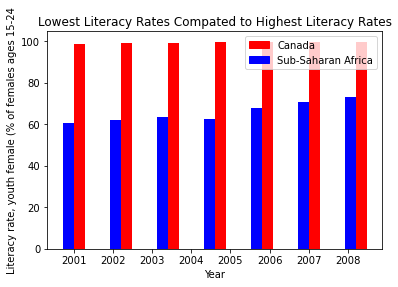

In [225]:
# Solution found here: https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
df_min = df_plot.loc[df_plot.economy.eq(min_lit)]
df_max = df_plot.loc[df_plot.economy.eq(max_lit)]
ax = plt.subplot(111)
w = 0.7
ax.bar(df_min.year-w/2, df_min.value, width=w, color='b', align='center')
ax.bar(df_min.year+w/2, df_max.value, width=w, color='r', align='center')
ax.set_xticklabels(np.arange(min(df_plot.year), max(df_plot.year)+3, 1))
# Legend solution found here: 
colors = {max_lit:'r', min_lit:'b'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# Labels
ax.set_xlabel('Year')
ax.set_ylabel(df_min.variable.unique().tolist()[0])
ax.set_title('Lowest Literacy Rates Compated to Highest Literacy Rates')

# Display
plt.show()